In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from matplotlib.colors import ListedColormap
from knn import KNN
from knn_kdtree import KNN_KDTree

In [2]:
path = "Datasets\\"

In [3]:
dataset = pd.read_csv(path + 'datasetKNN.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

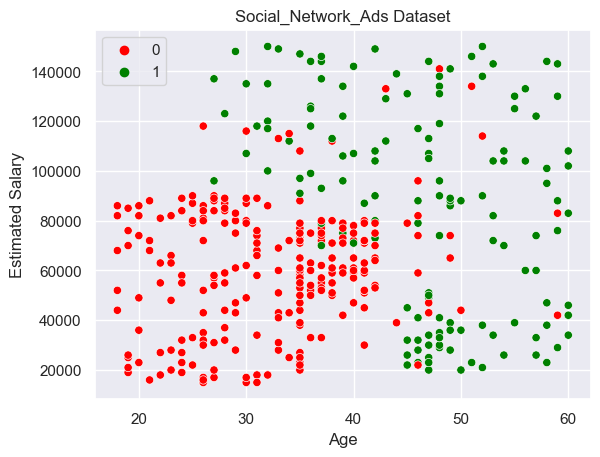

In [5]:


sns.set_theme()
fig, ax = plt.subplots()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['red', 'green'], ax=ax)
plt.title('Social_Network_Ads Dataset')
ax.set(xlabel='Age', ylabel='Estimated Salary')
plt.show()


In [6]:
new_x = 58
new_y = 142000
new_point = [(new_x, new_y)]


KNN prediction for [(58, 142000)]: 1
KNN with KDTree prediction for [(58, 142000)]: 1


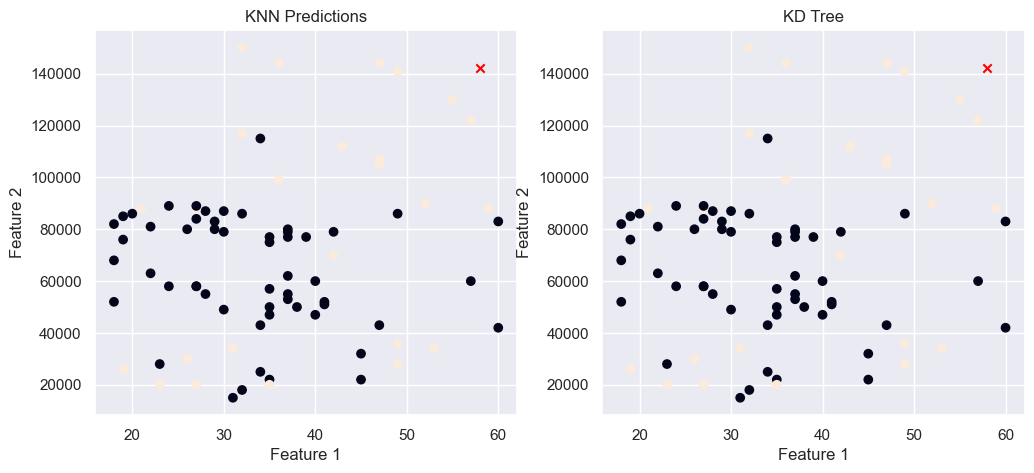

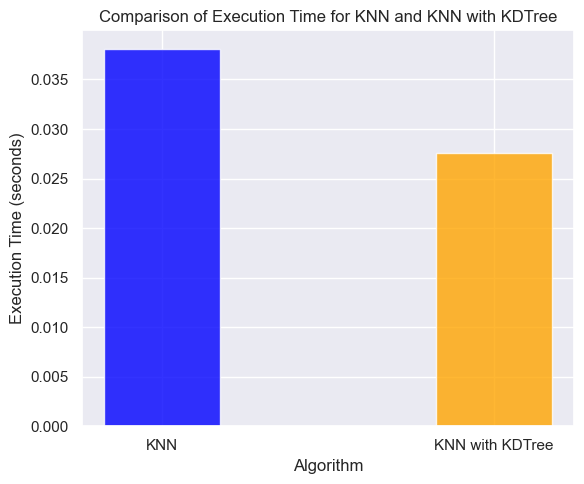

In [7]:
# Initialize the timer for KNN
start_time_knn = time.perf_counter()

# Fit KNN and predict
knn = KNN(k=3)
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)

# Predict the label of the new point using KNN
label_knn = knn.predict(np.array(new_point))[0]

# Calculate the execution time of KNN
start_time = time.perf_counter()
for i in range(10):
    knn.predict(X_test)
execution_time_knn = time.perf_counter() - start_time

# Initialize the timer for KNN with KDTree
start_time_kdtree = time.perf_counter()

# Fit KNN with KDTree and predict
knn_kdtree = KNN_KDTree(k=3)
knn_kdtree.fit(X_train, y_train)
prediction_kdtree = knn_kdtree.predict(X_test)

# Predict the label of the new point using KNN with KDTree
label_kdtree = knn_kdtree.predict(np.array(new_point))[0]

# Calculate the execution time of KNN with KDTree
start_time = time.perf_counter()
for i in range(10):
    knn_kdtree.predict(X_test)
execution_time_kdtree = time.perf_counter() - start_time

# Print the results
print('KNN prediction for {}: {}'.format(new_point, label_knn))
print('KNN with KDTree prediction for {}: {}'.format(new_point, label_kdtree))

# Visualize the predictions using scatter plots for KNN and KNN with KDTree
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X_test[:, 0], X_test[:, 1], c=prediction_knn)
axs[0].scatter(new_x, new_y, marker='x', c=[label_knn], cmap=ListedColormap(['red', 'green']))
axs[0].set_title('KNN Predictions')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

axs[1].scatter(X_test[:, 0], X_test[:, 1], c=prediction_kdtree)
axs[1].scatter(new_x, new_y, marker='x', c=[label_kdtree], cmap=ListedColormap(['red', 'green']))
axs[1].set_title('KD Tree')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

plt.show()

# Plot the execution time of KNN and KNN with KDTree in a bar chart
fig, ax = plt.subplots(figsize=(6, 5))

bar_width = 0.35
opacity = 0.8
colors = ['blue', 'orange']

execution_times = [execution_time_knn, execution_time_kdtree]

ax.bar(['KNN', 'KNN with KDTree'], execution_times, bar_width, alpha=opacity, color=colors)

plt.xlabel('Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Time for KNN and KNN with KDTree')

plt.tight_layout()
plt.show()
